<a href="https://colab.research.google.com/github/mridulhalder/Springboard/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load data and split into feature and target variables
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')

# Combine features and target in one dataframe for easier analysis
df = X.copy()
df['target'] = y  # 0: malignant, 1: benign

# View first 5 rows of the data
print("First 5 rows of data:")
print(df.head())
print(f"Number of columns: {len(X.columns)}")

# How frequently does the positive target occur
print("\nTarget distribution:")
print(df['target'].value_counts())
print(f"Percentage of benign tumors: {df['target'].mean()*100:.2f}%")


First 5 rows of data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst 

In [ ]:

# Generate summary statistics for the data
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             


Creating pairplot for first 5 features...


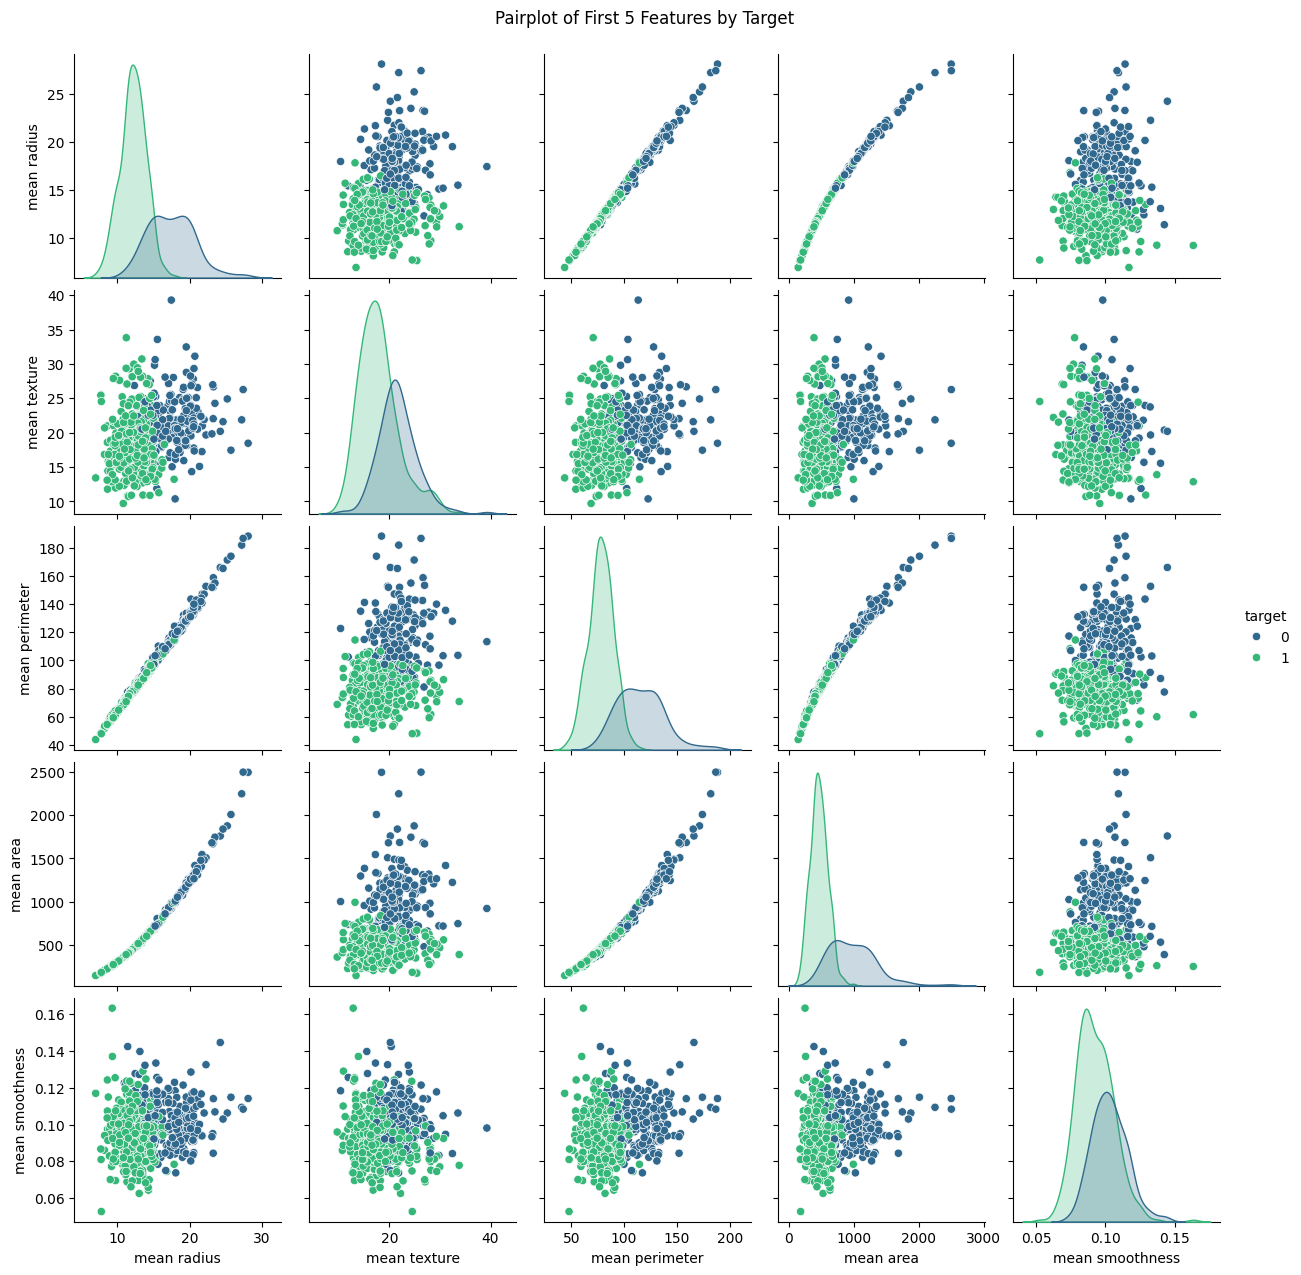

In [ ]:
# Create a pairplot for the first few features
print("\nCreating pairplot for first 5 features...")
selected_features = list(X.columns[:5]) + ['target']
sns.pairplot(df[selected_features], hue='target', palette='viridis')
plt.suptitle('Pairplot of First 5 Features by Target', y=1.02)
plt.show()


Creating correlation heatmap...


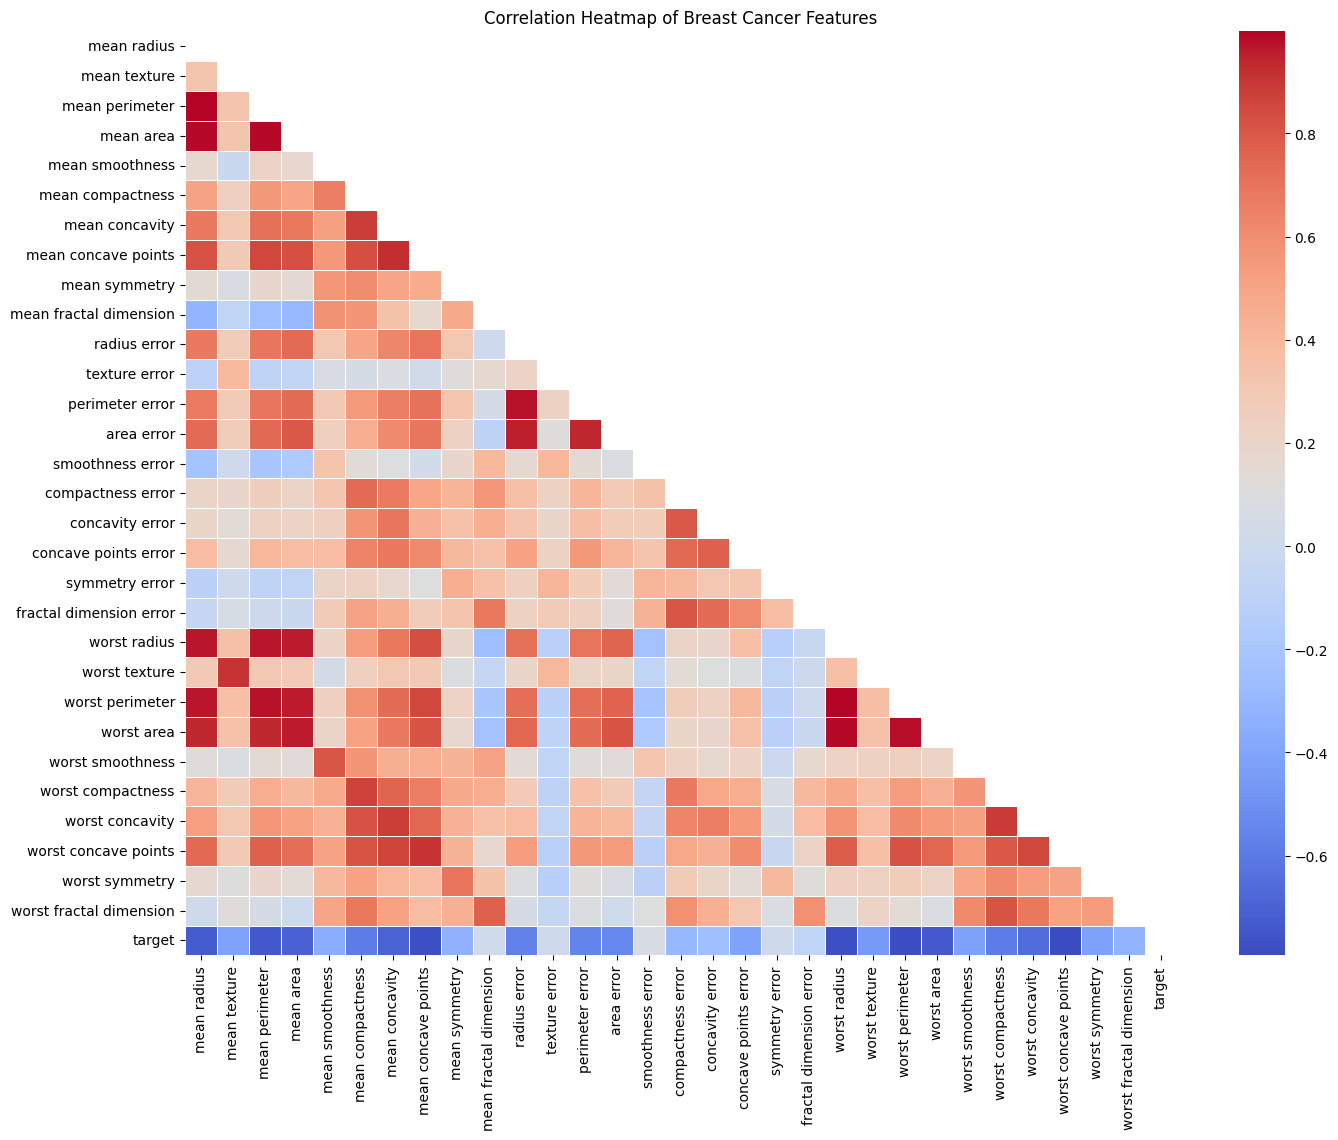

In [ ]:
# Create a correlation coefficient heatmap
print("\nCreating correlation heatmap...")
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()


Creating boxplots for key features by target...


/tmp/ipython-input-1109820191.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1109820191.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1109820191.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1109820191.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

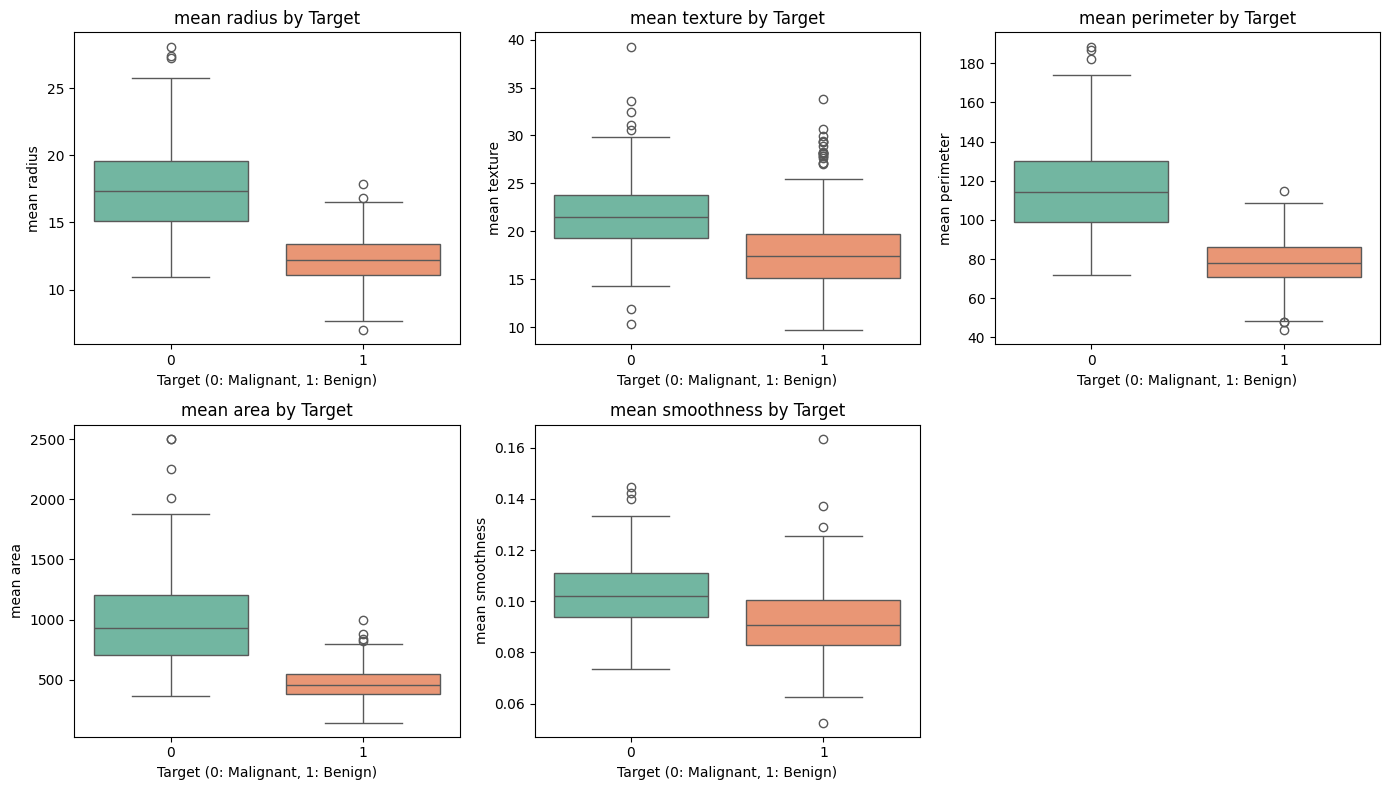

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Create boxplots for mean features by target type
breast_cancer = load_breast_cancer()
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')

df = X.copy()
df['target'] = y

print("\nCreating boxplots for key features by target...")
mean_features = [col for col in X.columns if 'mean' in col][:5]  # Get first 5 mean features

plt.figure(figsize=(14, 8))
for i, feature in enumerate(mean_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Target')
    plt.xlabel('Target (0: Malignant, 1: Benign)')
    plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assume X contains your features and y contains your target variable
# X, y = ... (already defined from previous steps)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train logistic regression model using the 'liblinear' solver
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)


### Calculate and print the percentages
    # train_percentage = len(X_train) / (len(X_train) + len(X_test)) * 100
    # test_percentage = len(X_test) / (len(X_train) + len(X_test)) * 100

    # print(f"Training data: {train_percentage:.2f}%")
    # print(f"Test data: {test_percentage:.2f}%")

###  Make predictions on test data
  # y_pred = model.predict(X_test)

### Evaluate model performance
  # from sklearn.metrics import accuracy_score
  # accuracy = accuracy_score(y_test, y_pred)
  # print(f"Accuracy: {accuracy}")

LogisticRegression(solver='liblinear')

In [16]:

from sklearn.metrics import confusion_matrix, classification_report

# Assume X contains your features and y contains your target variable
# X, y = ... (already defined from previous steps)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model: make predictions on the test data
y_pred = model.predict(X_test)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Extract false positives and false negatives
# cm layout: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = cm.ravel()
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[39  4]
 [ 1 70]]
False Positives (FP): 4
False Negatives (FN): 1

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/tmp/ipython-input-3900300136.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_coefficients = normalized_coefficients[sorted_idx]


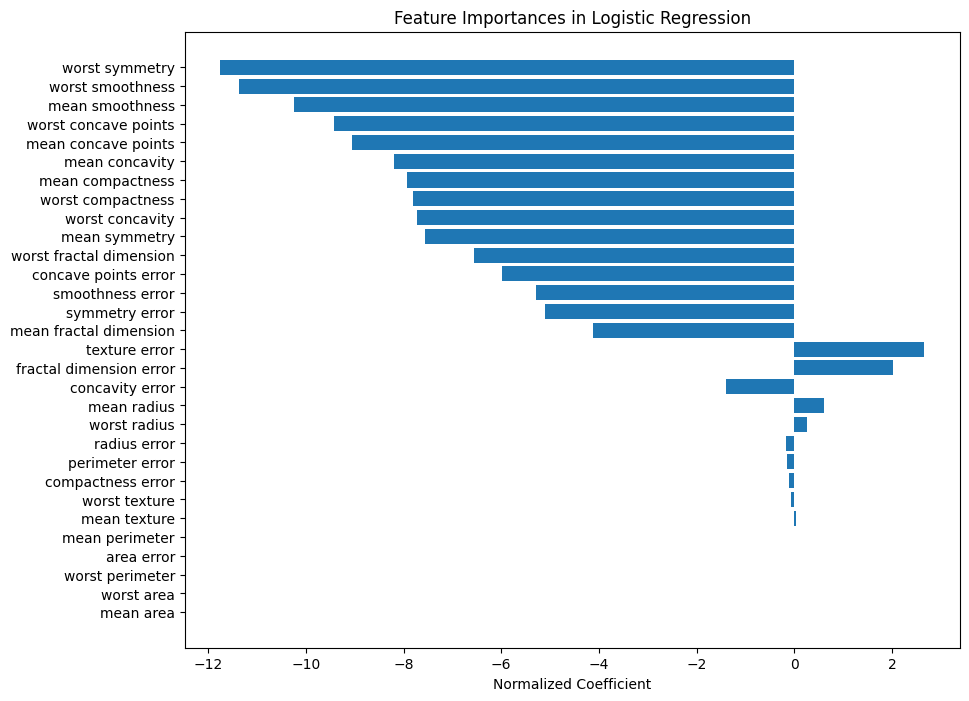

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Extract coefficients from the trained logistic regression model
coefficients = model.coef_[0]  # model is your trained LogisticRegression instance

# Normalize the coefficients by the standard deviation of each feature in the training data
feature_stds = X_train.std(axis=0)
normalized_coefficients = coefficients / feature_stds

# Get feature names
feature_names = X_train.columns

# Sort feature names and coefficients by absolute value of coefficients
sorted_idx = np.argsort(np.abs(normalized_coefficients))[::-1]
sorted_features = feature_names[sorted_idx]
sorted_coefficients = normalized_coefficients[sorted_idx]

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel('Normalized Coefficient')
plt.title('Feature Importances in Logistic Regression')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()